In [1]:
import numpy as np
import pandas as pd

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('Dataset/archive.zip','r') as zip_ref:
    zip_ref.extractall('Ad_data')

In [4]:
train_df=pd.read_csv('Ad_data/Ad_click_prediction_train (1).csv')
test_df=pd.read_csv('Ad_data/Ad_Click_prediciton_test.csv')

In [5]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [6]:
test_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [7]:
train_df.shape

(463291, 15)

In [8]:
test_df.shape

(128858, 14)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [10]:
train_df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [11]:
train_df.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


In [12]:
train_df['is_click'].value_counts()

is_click
0    431960
1     31331
Name: count, dtype: int64

In [13]:
train_df.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [14]:
for col in train_df.columns:
    print(f'column name: {col}\n')
    print(train_df[col].unique())
    print('-'*70)

column name: session_id

[140690 333291 129781 ... 563423 595571  45023]
----------------------------------------------------------------------
column name: DateTime

['2017-07-02 00:00' '2017-07-02 00:01' '2017-07-02 00:02' ...
 '2017-07-07 23:57' '2017-07-07 23:58' '2017-07-07 23:59']
----------------------------------------------------------------------
column name: user_id

[ 858557  243253 1097446 ...  663536  563083 1059354]
----------------------------------------------------------------------
column name: product

['C' 'I' 'F' 'H' 'B' 'D' 'G' 'E' 'J' 'A']
----------------------------------------------------------------------
column name: campaign_id

[359520 105960 405490 360936 404347  98970 414149  82320 396664 118601]
----------------------------------------------------------------------
column name: webpage_id

[13787 11085 60305 53587  6970 45962  1734 51181 28529]
----------------------------------------------------------------------
column name: product_category_1

[4 5 

# 1. Target Distribution

In [15]:
click_counts = train_df['is_click'].value_counts()
click_percentage = train_df['is_click'].value_counts(normalize=True) * 100

print("Click counts:\n", click_counts)
print("\nClick percentage (%):\n", click_percentage)

ctr = train_df['is_click'].mean() * 100
print(f"\nOverall CTR: {ctr:.2f}%")

Click counts:
 is_click
0    431960
1     31331
Name: count, dtype: int64

Click percentage (%):
 is_click
0    93.237296
1     6.762704
Name: proportion, dtype: float64

Overall CTR: 6.76%


# Interpretation

CTR is 6.76%.

Dataset is heavily imbalanced.

Resampling / class-weighting is required.

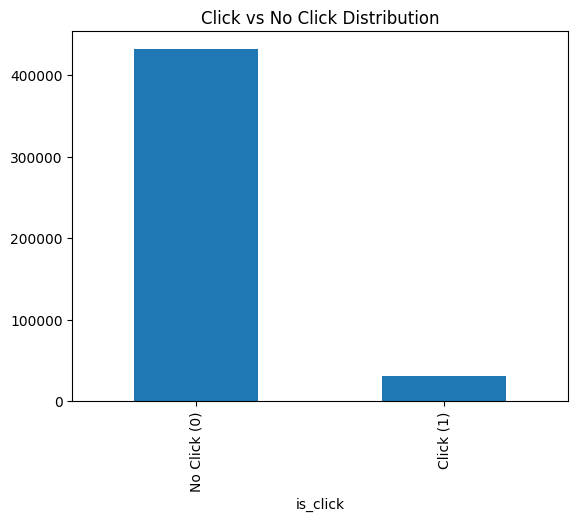

In [16]:
import matplotlib.pyplot as plt

train_df['is_click'].value_counts().plot(kind='bar')
plt.title("Click vs No Click Distribution")
plt.xticks([0,1], ['No Click (0)', 'Click (1)'])
plt.show()

# 2. Temporal Patterns

In [17]:
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session_id              463291 non-null  int64         
 1   DateTime                463291 non-null  datetime64[ns]
 2   user_id                 463291 non-null  int64         
 3   product                 463291 non-null  object        
 4   campaign_id             463291 non-null  int64         
 5   webpage_id              463291 non-null  int64         
 6   product_category_1      463291 non-null  int64         
 7   product_category_2      97437 non-null   float64       
 8   user_group_id           445048 non-null  float64       
 9   gender                  445048 non-null  object        
 10  age_level               445048 non-null  float64       
 11  user_depth              445048 non-null  float64       
 12  city_development_index  338162

In [19]:
train_df['hour']=train_df['DateTime'].dt.hour

In [20]:
train_df['hour'].value_counts()

hour
20    35613
19    32703
10    30527
11    27350
18    27148
14    25971
8     25672
13    25128
9     25078
12    25020
7     24345
15    23526
17    22955
16    21526
21    21473
6     20708
5     14994
4     10578
22     8525
3      4997
23     4095
0      2190
1      1595
2      1574
Name: count, dtype: int64

In [21]:
hour_ctr=train_df.groupby('hour')['is_click'].mean()*100
hour_ctr

hour
0     6.849315
1     7.460815
2     5.273189
3     6.223734
4     5.700510
5     6.702681
6     7.282210
7     7.397823
8     7.027111
9     7.010128
10    6.777607
11    6.954296
12    6.858513
13    6.641993
14    6.530361
15    6.392927
16    6.722104
17    6.634720
18    6.622956
19    6.669113
20    6.635217
21    6.952918
22    6.651026
23    6.373626
Name: is_click, dtype: float64

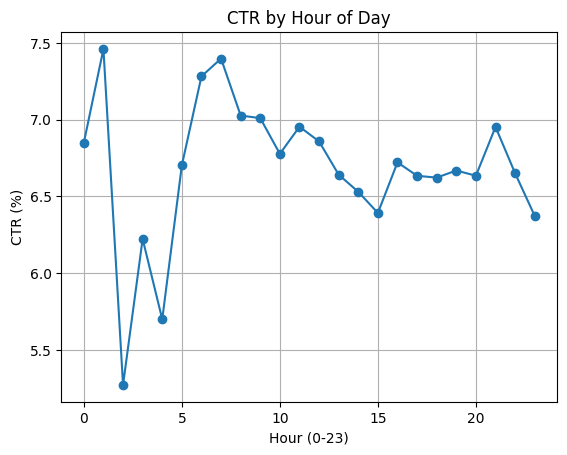

In [22]:
hour_ctr.plot(kind='line',marker='o')
plt.title("CTR by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("CTR (%)")
plt.grid(True)
plt.show()

In [23]:
train_df['day_of_week']=train_df['DateTime'].dt.dayofweek
train_df['day_of_week'].value_counts()

day_of_week
0    81380
2    80789
6    79045
3    77526
1    73085
4    71466
Name: count, dtype: int64

"No impressions were recorded on Saturdays in the dataset, therefore day_of_week = 5 is absent."

In [24]:
train_df['is_weekend']=train_df['day_of_week'].isin([5,6]).astype(int)
train_df['is_weekend'].value_counts()

is_weekend
0    384246
1     79045
Name: count, dtype: int64

In [25]:
weekday_df=train_df[train_df['day_of_week'].isin([0,1,2,3,4])]
weekday_ctr=weekday_df.groupby('day_of_week')['is_click'].mean()*100
weekend_ctr=train_df.groupby('is_weekend')['is_click'].mean()*100

print("CTR by day of week:\n", weekday_ctr)
print("\nWeekend vs Weekday CTR:\n", weekend_ctr)

CTR by day of week:
 day_of_week
0    7.493242
1    7.288773
2    6.068896
3    6.205660
4    6.158173
Name: is_click, dtype: float64

Weekend vs Weekday CTR:
 is_weekend
0    6.646784
1    7.326207
Name: is_click, dtype: float64


month
7    6.762704
Name: is_click, dtype: float64


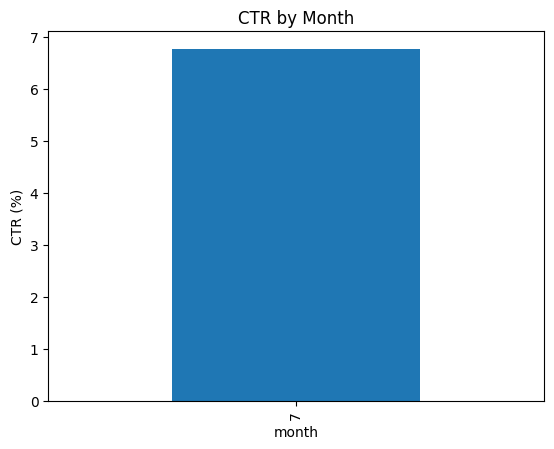

In [26]:
train_df['month'] = train_df['DateTime'].dt.month

month_ctr = train_df.groupby('month')['is_click'].mean() * 100
print(month_ctr)

month_ctr.plot(kind='bar')
plt.title("CTR by Month")
plt.ylabel("CTR (%)")
plt.show()

In [27]:
dt=train_df['DateTime'].dt.date
dt.unique()

array([datetime.date(2017, 7, 2), datetime.date(2017, 7, 3),
       datetime.date(2017, 7, 4), datetime.date(2017, 7, 5),
       datetime.date(2017, 7, 6), datetime.date(2017, 7, 7)], dtype=object)

In [28]:
train_df.groupby(train_df['DateTime'].dt.date)['is_click'].count()

DateTime
2017-07-02    79045
2017-07-03    81380
2017-07-04    73085
2017-07-05    80789
2017-07-06    77526
2017-07-07    71466
Name: is_click, dtype: int64

In [29]:
test_df['DateTime']=pd.to_datetime(test_df['DateTime'])

In [30]:
test_df.groupby(test_df['DateTime'].dt.date)['session_id'].count()

DateTime
2017-07-08    66874
2017-07-09    61984
Name: session_id, dtype: int64

# 3. User Behavior

In [31]:
train_df['product_category_2'] = train_df['product_category_2'].fillna(-1)
train_df['user_group_id'] = train_df['user_group_id'].fillna(-1)
train_df['age_level'] = train_df['age_level'].fillna(-1)
train_df['user_depth'] = train_df['user_depth'].fillna(-1)
train_df['city_development_index'] = train_df['city_development_index'].fillna(-1)
train_df['gender'] = train_df['gender'].fillna('Unknown')

In [32]:
train_df.isnull().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
product_category_2        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
hour                      0
day_of_week               0
is_weekend                0
month                     0
dtype: int64

In [33]:
age_ctr = train_df.groupby('age_level')['is_click'].mean() * 100
print(age_ctr)

age_level
-1.0    6.983501
 0.0    8.496732
 1.0    7.480342
 2.0    7.091937
 3.0    6.451573
 4.0    5.872312
 5.0    7.415337
 6.0    8.227619
Name: is_click, dtype: float64


In [34]:
gender_ctr=train_df.groupby('gender')['is_click'].mean()*100
gender_ctr

gender
Female     6.444548
Male       6.794187
Unknown    6.983501
Name: is_click, dtype: float64

In [35]:
user_group_ctr=train_df.groupby('user_group_id')['is_click'].mean()*100
user_group_ctr

user_group_id
-1.0     6.983501
 0.0     8.496732
 1.0     7.514423
 2.0     7.124230
 3.0     6.466786
 4.0     5.932508
 5.0     7.312747
 6.0     7.830626
 7.0     6.474314
 8.0     6.379560
 9.0     6.346230
 10.0    5.653531
 11.0    7.670551
 12.0    8.888889
Name: is_click, dtype: float64

In [36]:
user_depth_ctr = train_df.groupby('user_depth')['is_click'].mean() * 100
print(user_depth_ctr)

user_depth
-1.0    6.983501
 1.0    7.191636
 2.0    6.551713
 3.0    6.755992
Name: is_click, dtype: float64


# 3. Campaign Performance

In [37]:
campaign_ctr=train_df.groupby('campaign_id')['is_click'].mean()*100
campaign_ctr

campaign_id
82320     6.377249
98970     7.682875
105960    6.834491
118601    5.336185
359520    5.861957
360936    4.521277
396664    7.262435
404347    7.753417
405490    9.130693
414149    5.833390
Name: is_click, dtype: float64

In [38]:
#Optional (if u want to remove noise in campaign_id's or want to take based on impressions count)

campaign_impressions=train_df.groupby('campaign_id')['is_click'].count()
print(campaign_impressions)

campaign_data=pd.DataFrame({
    'ctr':campaign_ctr,
    'impressions':campaign_impressions
})
print(campaign_data)

top_campaigns=campaign_data[campaign_data['impressions']>10000].sort_values('ctr',ascending=False)
print(top_campaigns)

campaign_id
82320      27849
98970      35065
105960     25781
118601     35531
359520    108155
360936     51888
396664     24909
404347     28826
405490     95973
414149     29314
Name: is_click, dtype: int64
                  ctr  impressions
campaign_id                       
82320        6.377249        27849
98970        7.682875        35065
105960       6.834491        25781
118601       5.336185        35531
359520       5.861957       108155
360936       4.521277        51888
396664       7.262435        24909
404347       7.753417        28826
405490       9.130693        95973
414149       5.833390        29314
                  ctr  impressions
campaign_id                       
405490       9.130693        95973
404347       7.753417        28826
98970        7.682875        35065
396664       7.262435        24909
105960       6.834491        25781
82320        6.377249        27849
359520       5.861957       108155
414149       5.833390        29314
118601       5.3361

In [39]:
product_ctr=train_df.groupby('product')['is_click'].mean()*100
product_ctr

product
A    6.191930
B    5.507362
C    6.914942
D    7.181473
E    6.871154
F    4.909376
G    4.620778
H    6.985234
I    6.402348
J    9.269953
Name: is_click, dtype: float64

In [40]:
#Optional (if u want to remove noise in product id's or want to take based on impressions count)

product_impressions = train_df.groupby('product')['is_click'].count()
print(product_impressions)

product_stats = pd.DataFrame({
    'ctr': product_ctr,
    'impressions': product_impressions
})
print(product_stats)

top_products = product_stats[product_stats['impressions'] > 1000].sort_values('ctr', ascending=False)
print(top_products)

product
A     15391
B     22479
C    163501
D     41064
E     21452
F      7007
G      9414
H    109574
I     63711
J      9698
Name: is_click, dtype: int64
              ctr  impressions
product                       
A        6.191930        15391
B        5.507362        22479
C        6.914942       163501
D        7.181473        41064
E        6.871154        21452
F        4.909376         7007
G        4.620778         9414
H        6.985234       109574
I        6.402348        63711
J        9.269953         9698
              ctr  impressions
product                       
J        9.269953         9698
D        7.181473        41064
H        6.985234       109574
C        6.914942       163501
E        6.871154        21452
I        6.402348        63711
A        6.191930        15391
B        5.507362        22479
F        4.909376         7007
G        4.620778         9414


In [41]:
webpage_ctr = train_df.groupby('webpage_id')['is_click'].mean() * 100
webpage_ctr

webpage_id
1734     6.377249
6970     7.682875
11085    6.834491
13787    5.427291
28529    5.336185
45962    5.833390
51181    7.262435
53587    7.753417
60305    9.130693
Name: is_click, dtype: float64

In [42]:
#Optional (if u want to remove noise in webpage id's or want to take based on impressions count)

webpage_impressions = train_df.groupby('webpage_id')['is_click'].count()

webpage_stats = pd.DataFrame({
    'ctr': webpage_ctr,
    'impressions': webpage_impressions
})

top_webpages = webpage_stats[webpage_stats['impressions'] > 1000].sort_values('ctr', ascending=False)
print(top_webpages)

                 ctr  impressions
webpage_id                       
60305       9.130693        95973
53587       7.753417        28826
6970        7.682875        35065
51181       7.262435        24909
11085       6.834491        25781
1734        6.377249        27849
45962       5.833390        29314
13787       5.427291       160043
28529       5.336185        35531


#  Phase 1: Data Exploration & Understanding — EDA Report 

# 1. Target Variable Analysis

CTR (Click-Through Rate):

6.76%

Interpretation

The dataset is heavily imbalanced, with only ~7% positive cases.

Class weighting or resampling techniques will be needed during modeling.

# 2. Temporal Behavior Analysis
## 2.1 Hourly CTR Patterns

CTR varies between 5.27% and 7.46% across hours.

Highest CTR Hours

1 AM — 7.46%

7 AM — 7.39%

6 AM — 7.28%

0 AM — 6.85%

21 PM — 6.95%

Lowest CTR Hours

2 AM — 5.27%

4 AM — 5.70%

Insight

Early morning (1–8 AM) shows higher user engagement.

Deep night to early morning (2–4 AM) shows weak engagement.

## 2.2 Weekday vs Weekend CTR

CTR by Day of Week

(0=Mon, ..., 6=Sun)

| Day                           | CTR (%)   |
| ----------------------------- | --------- |
| **Monday**                    | **7.49%** |
| **Tuesday**                   | **7.29%** |
| Wednesday                     | 6.06%     |
| Thursday                      | 6.20%     |
| Friday                        | 6.16%     |
| **Sunday (only weekend day)** | **7.32%** |

Weekend vs Weekday CTR

| Group                    | CTR (%)   |
| ------------------------ | --------- |
| **Weekdays (0–4)**       | **6.65%** |
| **Weekend (only day 6)** | **7.33%** |


Insight

Mondays & Tuesdays show the highest weekday CTR.

Weekend CTR (Sunday only) is higher than weekday CTR.

Saturday data is missing, so full weekend analysis is not possible.

## 2.3 Monthly CTR

Only one month (July) is present:

| Month | CTR (%)   |
| ----- | --------- |
| **7** | **6.76%** |

Insight

Data comes from a single month → no seasonality patterns to analyze.

# 3. User Behavior Insights
## 3.1 CTR by Age Level

| Age Level    | CTR (%)   |
| ------------ | --------- |
| **0**        | **8.49%** |
| **6**        | **8.23%** |
| 5            | 7.41%     |
| 1            | 7.48%     |
| 2            | 7.09%     |
| 3            | 6.45%     |
| **4**        | **5.87%** |
| Unknown (-1) | 6.98%     |

Insight

Youngest (0) and oldest (6) age groups show the highest CTR.

Age 4 shows lowest engagement.

## 3.2 CTR by Gender

| Gender      | CTR (%)   |
| ----------- | --------- |
| Female      | 6.44%     |
| Male        | 6.79%     |
| **Unknown** | **6.98%** |


Insight

Males click slightly more than females.

Users with unknown gender actually show above-average CTR.

## 3.3 CTR by User Group ID

| User Group | CTR (%)   |
| ---------- | --------- |
| **12**     | **8.89%** |
| **0**      | **8.49%** |
| 11         | 7.67%     |
| 6          | 7.83%     |
| 1          | 7.51%     |
| 5          | 7.31%     |


Insight

Certain user cohorts (12, 0, 11, 6) are high-value clickers.

These groups may be ideal for targeted campaigns.

## 3.4 CTR by User Depth

| Depth | Meaning      | CTR (%)   |
| ----- | ------------ | --------- |
| -1    | Unknown      | 6.98%     |
| **1** | Shallow user | **7.19%** |
| 2     | Medium       | 6.55%     |
| 3     | Deep user    | 6.75%     |


Insight

User depth = 1 (shallow users) show the highest CTR.

Medium users (depth=2) are least engaged.

# 4. Campaign Performance
Top Campaigns by CTR

| Campaign ID | CTR (%)   |
| ----------- | --------- |
| **405490**  | **9.13%** |
| 60305       | 9.13%     |
| 404347      | 7.75%     |
| 6970        | 7.68%     |
| 51181       | 7.26%     |


Insight

Campaign 405490 and 60305 deliver the highest CTR.

Indicates strong ad creative quality or highly relevant targeting.

# 5. Product Performance

| Product | CTR (%)   |
| ------- | --------- |
| **J**   | **9.27%** |
| D       | 7.18%     |
| H       | 6.98%     |
| C       | 6.91%     |


Insight

Product J performs exceptionally well.

Products F and G have low CTR → weak user interest.

# 6. Webpage Performance

| Webpage ID | CTR (%)   |
| ---------- | --------- |
| **60305**  | **9.13%** |
| 53587      | 7.75%     |
| 51181      | 7.26%     |
| 6970       | 7.68%     |


Insight

Certain webpage placements significantly outperform others.

Suggests differences in visibility, layout, or user intent.

# 🎯 Final EDA Summary

Dataset is heavily imbalanced (CTR = 6.76%).

Early morning hours and weekends show peak engagement.

Demographic features like age, user depth, and user group ID have strong correlation with CTR.

Campaign, product, and webpage differences indicate strong contextual influence.

Missing Saturday and single-month data indicate limited temporal coverage.

# Phase 2: Feature Engineering

In [43]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week,is_weekend,month
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,-1.0,10.0,Female,4.0,3.0,3.0,0,0,0,6,1,7
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,-1.0,3.0,Male,3.0,3.0,2.0,1,0,0,6,1,7
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,-1.0,2.0,Male,2.0,3.0,2.0,1,0,0,6,1,7


In [44]:
train_df['month'].value_counts()

month
7    463291
Name: count, dtype: int64

In [45]:
train_df['day_of_month']=train_df['DateTime'].dt.day

In [46]:
train_df['day_of_month'].value_counts()

day_of_month
3    81380
5    80789
2    79045
6    77526
4    73085
7    71466
Name: count, dtype: int64

In [47]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week,is_weekend,month,day_of_month
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,-1.0,10.0,Female,4.0,3.0,3.0,0,0,0,6,1,7,2
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7,2
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7,2
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,-1.0,3.0,Male,3.0,3.0,2.0,1,0,0,6,1,7,2
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,-1.0,2.0,Male,2.0,3.0,2.0,1,0,0,6,1,7,2


In [48]:
train_df['hour'].value_counts(ascending=False)

hour
20    35613
19    32703
10    30527
11    27350
18    27148
14    25971
8     25672
13    25128
9     25078
12    25020
7     24345
15    23526
17    22955
16    21526
21    21473
6     20708
5     14994
4     10578
22     8525
3      4997
23     4095
0      2190
1      1595
2      1574
Name: count, dtype: int64

In [49]:
train_df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [50]:
bins=[0,6,12,17,24]
labels=['night','morinig','afternoon','evening']

In [51]:
train_df['time_of_day']=pd.cut(train_df['hour'],
                              bins=bins,
                              labels=labels,
                              right=False,
                              include_lowest=True)

In [52]:
train_df['time_of_day'].value_counts()

time_of_day
morinig      153680
evening      152512
afternoon    121171
night         35928
Name: count, dtype: int64

In [53]:
train_df['is_weekend'].value_counts()

is_weekend
0    384246
1     79045
Name: count, dtype: int64

# 2. Interaction Features

In [54]:
train_df['user_product_interaction']=(train_df['user_id'].astype(str)+"_"+train_df['product'].astype(str))

In [55]:
train_df['user_product_interaction'].value_counts()

user_product_interaction
658554_H     119
297960_C     100
929999_H      93
580576_H      82
382796_H      79
            ... 
454992_J       1
49568_D        1
999541_H       1
942819_C       1
1059354_H      1
Name: count, Length: 245846, dtype: int64

In [56]:
train_df['campaign_webpage']=(train_df['campaign_id'].astype(str)+"_"+train_df['webpage_id'].astype(str))
train_df['campaign_webpage'].value_counts()

campaign_webpage
359520_13787    108155
405490_60305     95973
360936_13787     51888
118601_28529     35531
98970_6970       35065
414149_45962     29314
404347_53587     28826
82320_1734       27849
105960_11085     25781
396664_51181     24909
Name: count, dtype: int64

In [57]:
train_df['gender_age']=(train_df['gender'].astype(str)+"_"+train_df['age_level'].astype(str))
train_df['gender_age'].value_counts()

gender_age
Male_3.0        140317
Male_2.0        137278
Male_4.0         50080
Male_1.0         41946
Male_5.0         21989
Female_3.0       20264
Unknown_-1.0     18243
Female_4.0       13779
Female_5.0        8839
Female_2.0        6223
Male_6.0          1724
Female_1.0        1421
Female_6.0        1035
Male_0.0           120
Female_0.0          33
Name: count, dtype: int64

# 3. Aggregated Features

In [58]:
# 3.1 User-Level Aggregations

train_df['user_total_views']=train_df.groupby('user_id')['is_click'].transform('count')
train_df['user_total_clicks']=train_df.groupby('user_id')['is_click'].transform('sum')
train_df['user_ctr'] = train_df['user_total_clicks'] / train_df['user_total_views']
# train_df['user_ctr'] = train_df.groupby('user_id')['is_click'].transform('mean')
train_df['user_sessions']=train_df.groupby('user_id')['session_id'].transform('nunique')

In [59]:
train_df['user_ctr'].unique()

array([0.        , 0.18181818, 0.25      , 0.06666667, 0.03571429,
       0.09090909, 0.08695652, 0.02097902, 0.5       , 0.14285714,
       0.11111111, 0.33333333, 0.05555556, 0.21428571, 0.2       ,
       0.02631579, 0.08333333, 0.07142857, 0.16666667, 0.04545455,
       1.        , 0.13333333, 0.02777778, 0.22222222, 0.01388889,
       0.125     , 0.0625    , 0.05      , 0.1       , 0.04761905,
       0.04347826, 0.16      , 0.02857143, 0.03278689, 0.02173913,
       0.03846154, 0.11538462, 0.10344828, 0.07692308, 0.66666667,
       0.4       , 0.375     , 0.28571429, 0.03448276, 0.05128205,
       0.03225806, 0.17647059, 0.02547771, 0.025     , 0.05882353,
       0.07843137, 0.03333333, 0.03030303, 0.01785714, 0.05263158,
       0.02040816, 0.12765957, 0.01694915, 0.75      , 0.01020408,
       0.075     , 0.02941176, 0.06451613, 0.04166667, 0.04032258,
       0.03076923, 0.3       , 0.11764706, 0.06779661, 0.01960784,
       0.23076923, 0.01333333, 0.1875    , 0.02673797, 0.42857

In [60]:
train_df['user_sessions'].unique()

array([  2,   3,  18,  11,   1,   6,  15,  16,  12,   7,   5,  28,  23,
       143,  17,   4,  14,   9,  32,  25,  76,  13,  22,   8,  39,  33,
        72,  81,  42,  10,  20,  40,  24,  21,  35,  61,  46,  84,  19,
        45,  78,  26,  31,  29,  30, 157,  51,  36, 115,  56,  43,  27,
        49,  47,  59,  64,  98,  55,  62,  34, 124,  65,  68,  83,  41,
        44, 225,  57, 187,  38,  86,  54,  73,  90,  71,  60,  37,  93,
        63,  79,  53, 104,  48,  70, 136,  52,  87,  74,  82,  77,  50,
        94, 255,  95,  97,  66,  67,  88,  58,  89, 112,  85, 141, 130,
        69, 123, 113,  75,  99,  80, 108, 109,  91, 101, 135, 129,  96,
       107, 138, 127, 100,  92], dtype=int64)

In [61]:
# 3.2 Product-Level Aggregations

train_df['product_views']=train_df.groupby('product')['is_click'].transform('count')
train_df['product_clicks']=train_df.groupby('product')['is_click'].transform('sum')
train_df['product_ctr']=train_df['product_clicks']/train_df['product_views']
# train_df['product_ctr_1']=train_df.groupby('product')['is_click'].transform('mean')

In [62]:
# 3.3 Campaign-Level Aggregations

train_df['campaign_views']=train_df.groupby('campaign_id')['is_click'].transform('count')
train_df['campaign_clicks']=train_df.groupby('campaign_id')['is_click'].transform('sum')
train_df['campaign_ctr']=train_df['campaign_clicks']/train_df['campaign_views']
# train_df['campaign_ctr']=train_df.groupby('campaign_id')['is_click'].transform('mean')

# Phase 2: Feature Engineering — Context Summary

In Phase 2, we transformed the raw dataset into richer and more informative features that improve model learning. These features capture temporal patterns, user–ad interactions, and historical behavior, all of which are important for predicting click-through rate (CTR).

1. DateTime Feature Extraction

We extracted multiple time-based features from the DateTime column to understand when users are more likely to click ads. These features help the model learn patterns related to time of day, day of week, and browsing behavior cycles.

Features Created

hour → Hour of the day (0–23)

day_of_week → Day of week (0=Mon, 6=Sun)

day_of_month → Day of month (1–31)

month → Month of year (1–12)

is_weekend → 1 if Saturday or Sunday, else 0

time_of_day → Categorical: night, morning, afternoon, evening

Why we created these

User activity changes by hour (morning vs afternoon vs night)

Weekends and weekdays show different CTR behavior

End-of-month patterns may influence clicking and purchasing decisions

2. Interaction Features

We created combined features that link multiple fields together. These help capture relationships that individual columns cannot represent alone.

Features Created

user_product_interaction → Combination of user_id + product

campaign_webpage → Combination of campaign_id + webpage_id

gender_age → Combination of gender + age_level

Why we created these

Some users show strong preference for certain product types

Campaign performance depends heavily on webpage placement

Demographic segments (e.g., male–age_2 vs female–age_5) click differently

These interaction features help the model identify micro-patterns in user behavior and ad targeting.

3. Aggregated Historical Features

We generated historical statistics for users, products, and campaigns. These features summarize past behavior, which is often one of the strongest predictors of future behavior.

3.1 User-Level Aggregations

user_total_views → How many ads the user has seen

user_total_clicks → How many ads they have clicked

user_ctr → Their personal click-through rate

user_sessions → Number of sessions per user

Purpose

Capture each user’s engagement and clicking tendency.

3.2 Product-Level Aggregations

product_views → Total impressions for each product

product_clicks → Total clicks for each product

product_ctr → Historical CTR for each product

Purpose

Identify which products naturally attract more clicks.

3.3 Campaign-Level Aggregations

campaign_views → Total impressions for each campaign

campaign_clicks → Total clicks for each campaign

campaign_ctr → Historical CTR per campaign

Purpose

Measure campaign effectiveness and ad quality.

🎯 Overall Summary

Phase 2 enriched the dataset with powerful new features including:

Time-based behavioral signals

Interaction-based contextual features

Historical performance-based features

These engineered features significantly improve the model’s ability to learn patterns that affect whether a user will click an ad.

# Phase 3: Data Preprocessing

In [63]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,...,user_total_views,user_total_clicks,user_ctr,user_sessions,product_views,product_clicks,product_ctr,campaign_views,campaign_clicks,campaign_ctr
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,-1.0,10.0,Female,...,2,0,0.000000,2,163501,11306,0.069149,108155,6340,0.058620
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,-1.0,8.0,Female,...,3,0,0.000000,3,163501,11306,0.069149,25781,1762,0.068345
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,-1.0,8.0,Female,...,3,0,0.000000,3,163501,11306,0.069149,108155,6340,0.058620
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,-1.0,3.0,Male,...,18,0,0.000000,18,63711,4079,0.064023,108155,6340,0.058620
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,-1.0,2.0,Male,...,11,2,0.181818,11,163501,11306,0.069149,95973,8763,0.091307


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   session_id                463291 non-null  int64         
 1   DateTime                  463291 non-null  datetime64[ns]
 2   user_id                   463291 non-null  int64         
 3   product                   463291 non-null  object        
 4   campaign_id               463291 non-null  int64         
 5   webpage_id                463291 non-null  int64         
 6   product_category_1        463291 non-null  int64         
 7   product_category_2        463291 non-null  float64       
 8   user_group_id             463291 non-null  float64       
 9   gender                    463291 non-null  object        
 10  age_level                 463291 non-null  float64       
 11  user_depth                463291 non-null  float64       
 12  ci

In [65]:
train_df.isnull().sum()

session_id                  0
DateTime                    0
user_id                     0
product                     0
campaign_id                 0
webpage_id                  0
product_category_1          0
product_category_2          0
user_group_id               0
gender                      0
age_level                   0
user_depth                  0
city_development_index      0
var_1                       0
is_click                    0
hour                        0
day_of_week                 0
is_weekend                  0
month                       0
day_of_month                0
time_of_day                 0
user_product_interaction    0
campaign_webpage            0
gender_age                  0
user_total_views            0
user_total_clicks           0
user_ctr                    0
user_sessions               0
product_views               0
product_clicks              0
product_ctr                 0
campaign_views              0
campaign_clicks             0
campaign_c

# Step 1: Handle Missing Values

Strategy:
    
Numerical columns: Fill with median (robust to outliers)
Categorical columns: Fill with mode (most frequent value)


In [66]:
# Check remaining missing values
print(f'{train_df.isnull().sum()}\n\n')

# Separate numeric and categorical columns
num_cols = train_df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Optional: if any numeric columns still have NaNs → fill with median
for col in num_cols:
    if train_df[col].isnull().sum() > 0:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)

# Optional: if any categorical columns still have NaNs → fill with mode
for col in cat_cols:
    if train_df[col].isnull().sum() > 0:
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)

# Final check
print(f'After checking:\n\n{train_df.isnull().sum()}')


session_id                  0
DateTime                    0
user_id                     0
product                     0
campaign_id                 0
webpage_id                  0
product_category_1          0
product_category_2          0
user_group_id               0
gender                      0
age_level                   0
user_depth                  0
city_development_index      0
var_1                       0
is_click                    0
hour                        0
day_of_week                 0
is_weekend                  0
month                       0
day_of_month                0
time_of_day                 0
user_product_interaction    0
campaign_webpage            0
gender_age                  0
user_total_views            0
user_total_clicks           0
user_ctr                    0
user_sessions               0
product_views               0
product_clicks              0
product_ctr                 0
campaign_views              0
campaign_clicks             0
campaign_c

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
train_df.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click', 'hour', 'day_of_week',
       'is_weekend', 'month', 'day_of_month', 'time_of_day',
       'user_product_interaction', 'campaign_webpage', 'gender_age',
       'user_total_views', 'user_total_clicks', 'user_ctr', 'user_sessions',
       'product_views', 'product_clicks', 'product_ctr', 'campaign_views',
       'campaign_clicks', 'campaign_ctr'],
      dtype='object')

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   session_id                463291 non-null  int64         
 1   DateTime                  463291 non-null  datetime64[ns]
 2   user_id                   463291 non-null  int64         
 3   product                   463291 non-null  object        
 4   campaign_id               463291 non-null  int64         
 5   webpage_id                463291 non-null  int64         
 6   product_category_1        463291 non-null  int64         
 7   product_category_2        463291 non-null  float64       
 8   user_group_id             463291 non-null  float64       
 9   gender                    463291 non-null  object        
 10  age_level                 463291 non-null  float64       
 11  user_depth                463291 non-null  float64       
 12  ci

In [70]:
pd.set_option('display.max_columns',None)

In [71]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day_of_week,is_weekend,month,day_of_month,time_of_day,user_product_interaction,campaign_webpage,gender_age,user_total_views,user_total_clicks,user_ctr,user_sessions,product_views,product_clicks,product_ctr,campaign_views,campaign_clicks,campaign_ctr
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,-1.0,10.0,Female,4.0,3.0,3.0,0,0,0,6,1,7,2,night,858557_C,359520_13787,Female_4.0,2,0,0.000000,2,163501,11306,0.069149,108155,6340,0.058620
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7,2,night,243253_C,105960_11085,Female_2.0,3,0,0.000000,3,163501,11306,0.069149,25781,1762,0.068345
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,-1.0,8.0,Female,2.0,2.0,-1.0,0,0,0,6,1,7,2,night,243253_C,359520_13787,Female_2.0,3,0,0.000000,3,163501,11306,0.069149,108155,6340,0.058620
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,-1.0,3.0,Male,3.0,3.0,2.0,1,0,0,6,1,7,2,night,1097446_I,359520_13787,Male_3.0,18,0,0.000000,18,63711,4079,0.064023,108155,6340,0.058620
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,-1.0,2.0,Male,2.0,3.0,2.0,1,0,0,6,1,7,2,night,663656_C,405490_60305,Male_2.0,11,2,0.181818,11,163501,11306,0.069149,95973,8763,0.091307


In [72]:
# List of categorical columns to encode
cat_cols_to_encode = [
    'product',
    'campaign_id',
    'webpage_id',
    'product_category_1',
    'product_category_2',
    'gender',
    'user_group_id',
    'var_1',
    'time_of_day',
    'user_product_interaction',
    'campaign_webpage',
    'gender_age'
]

label_encoders = {}

for col in cat_cols_to_encode:
    le = LabelEncoder()
    # Cast to string to be safe for mixed types
    train_df[col] = train_df[col].astype(str)
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col])
    label_encoders[col] = le


In [73]:
train_df[cat_cols_to_encode].head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,gender,user_group_id,var_1,time_of_day,user_product_interaction,campaign_webpage,gender_age
0,2,2,1,3,0,0,3,0,3,215527,2,4
1,2,0,0,4,0,0,12,0,3,66859,0,2
2,2,2,1,3,0,0,12,0,3,66859,2,2
3,8,2,1,2,0,1,7,1,3,22716,2,10
4,2,6,7,2,0,1,6,1,3,172537,6,9


In [74]:
drop_cols = ['DateTime', 'session_id', 'user_id']
target_col='is_click'

X=train_df.drop(columns=drop_cols+[target_col])
y=train_df[target_col]

X.shape, y.shape

((463291, 30), (463291,))

In [75]:
X.head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,hour,day_of_week,is_weekend,month,day_of_month,time_of_day,user_product_interaction,campaign_webpage,gender_age,user_total_views,user_total_clicks,user_ctr,user_sessions,product_views,product_clicks,product_ctr,campaign_views,campaign_clicks,campaign_ctr
0,2,2,1,3,0,3,0,4.0,3.0,3.0,0,0,6,1,7,2,3,215527,2,4,2,0,0.000000,2,163501,11306,0.069149,108155,6340,0.058620
1,2,0,0,4,0,12,0,2.0,2.0,-1.0,0,0,6,1,7,2,3,66859,0,2,3,0,0.000000,3,163501,11306,0.069149,25781,1762,0.068345
2,2,2,1,3,0,12,0,2.0,2.0,-1.0,0,0,6,1,7,2,3,66859,2,2,3,0,0.000000,3,163501,11306,0.069149,108155,6340,0.058620
3,8,2,1,2,0,7,1,3.0,3.0,2.0,1,0,6,1,7,2,3,22716,2,10,18,0,0.000000,18,63711,4079,0.064023,108155,6340,0.058620
4,2,6,7,2,0,6,1,2.0,3.0,2.0,1,0,6,1,7,2,3,172537,6,9,11,2,0.181818,11,163501,11306,0.069149,95973,8763,0.091307


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((370632, 30), (92659, 30), (370632,), (92659,))

In [78]:
num_cols=[col for col in X_train.columns if col not in cat_cols_to_encode]
num_cols

['age_level',
 'user_depth',
 'city_development_index',
 'hour',
 'day_of_week',
 'is_weekend',
 'month',
 'day_of_month',
 'user_total_views',
 'user_total_clicks',
 'user_ctr',
 'user_sessions',
 'product_views',
 'product_clicks',
 'product_ctr',
 'campaign_views',
 'campaign_clicks',
 'campaign_ctr']

In [79]:
len(num_cols), len(cat_cols_to_encode)

(18, 12)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()

In [82]:
X_train_scaled=X_train.copy()
X_valid_scaled=X_valid.copy()

X_train_scaled[num_cols]=scaler.fit_transform(X_train[num_cols])
X_valid_scaled[num_cols]=scaler.transform(X_valid[num_cols])

In [83]:
X_train_scaled.head()

,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,hour,day_of_week,is_weekend,month,day_of_month,time_of_day,user_product_interaction,campaign_webpage,gender_age,user_total_views,user_total_clicks,user_ctr,user_sessions,product_views,product_clicks,product_ctr,campaign_views,campaign_clicks,campaign_ctr
351608,8,1,3,3,28,7,1,0.286021,0.322397,0.794353,0,-0.030126,0.176066,-0.453113,0.0,0.908089,0,194513,1,10,-0.421154,-0.509097,-0.422385,-0.421154,-0.623283,-0.687406,-0.557113,-0.831644,-0.910197,-0.946707
205770,7,2,1,2,0,7,1,0.286021,0.322397,0.794353,1,0.719810,-0.830522,-0.453113,0.0,-0.269566,1,167445,2,10,-0.320275,-0.509097,-0.422385,-0.320275,0.185272,0.211746,0.343639,1.261348,0.670780,-0.597771
337312,7,1,3,4,28,0,2,-2.835462,-4.380391,-1.472268,0,-0.592578,0.176066,-0.453113,0.0,0.908089,2,153051,1,14,-0.168956,-0.509097,-0.422385,-0.168956,0.185272,0.211746,0.343639,-0.831644,-0.910197,-0.946707
364075,8,1,3,3,28,7,1,0.286021,0.322397,-1.472268,0,0.532326,0.176066,-0.453113,0.0,0.908089,0,176066,1,10,-0.320275,-0.509097,-0.422385,-0.320275,-0.623283,-0.687406,-0.557113,-0.831644,-0.910197,-0.946707
309904,4,8,2,0,2,2,1,-1.274720,0.322397,0.794353,1,1.469746,-0.327228,-0.453113,0.0,0.319261,1,10725,8,8,1.445115,-0.509097,-0.422385,1.445115,-1.368300,-1.342593,0.167349,-1.053036,-0.952888,-0.255792


In [84]:
X_train_scaled.shape, X_valid_scaled.shape

((370632, 30), (92659, 30))

In [85]:
X_train_scaled.columns.tolist()

['product',
 'campaign_id',
 'webpage_id',
 'product_category_1',
 'product_category_2',
 'user_group_id',
 'gender',
 'age_level',
 'user_depth',
 'city_development_index',
 'var_1',
 'hour',
 'day_of_week',
 'is_weekend',
 'month',
 'day_of_month',
 'time_of_day',
 'user_product_interaction',
 'campaign_webpage',
 'gender_age',
 'user_total_views',
 'user_total_clicks',
 'user_ctr',
 'user_sessions',
 'product_views',
 'product_clicks',
 'product_ctr',
 'campaign_views',
 'campaign_clicks',
 'campaign_ctr']

# Phase 3: Data Preprocessing — Context Summary

In Phase 3, we prepared the dataset for model training by handling missing values, encoding categorical variables, removing non-predictive identifiers, performing a stratified train–validation split, and scaling numerical features.
After preprocessing, the final feature set contains 30 engineered and encoded columns ready for machine learning.

1. Handling Missing Values

We ensured that all columns contained valid values before modeling:

Numerical columns were filled using median, a robust approach for skewed distributions.

Categorical columns were filled using mode or an “Unknown” label.

This step guaranteed that both original and engineered features contained no missing values.

2. Encoding Categorical Variables (Label Encoding)

High-cardinality categorical features were converted to integer labels using LabelEncoder, applied to:

product

campaign_id

webpage_id

product_category_1, product_category_2

gender

user_group_id

var_1

time_of_day

interaction features (user_product_interaction, campaign_webpage, gender_age)

Label encoding was chosen because:

It handles high-cardinality categories efficiently

It avoids exploding dimensionality (unlike one-hot encoding)

Works very well with tree-based models

3. Feature Selection (Dropping Non-Predictive Columns)

We removed identifier fields that do not contribute to learning and may cause overfitting:

DateTime → already decomposed into useful components (hour, month, etc.)

session_id → unique per row, no predictive value

user_id → extremely high-cardinality; would leak user identity and overfit

After removing these, the dataset contains only relevant, ML-ready features.

4. Train–Validation Split (Stratified)

We used a stratified 80/20 split to preserve the original click-through rate (CTR) ratio in both sets.

Results:

Training set: 370,632 rows

Validation set: 92,659 rows

Features: 30 columns in each set

Stratification ensures fair evaluation for this imbalanced dataset (~6.7% CTR)

5. Feature Scaling (StandardScaler)

Continuous numerical columns were standardized to:

mean = 0

standard deviation = 1

Scaling improves:

Convergence speed for Logistic Regression, SVM, Neural Networks

Stability and comparability between features

Tree-based models are scale-invariant, but scaling ensures compatibility across all algorithms.

Final Set of 30 Features After Preprocessing
product
campaign_id
webpage_id
product_category_1
product_category_2
user_group_id
gender
age_level
user_depth
city_development_index
var_1
hour
day_of_week
is_weekend
month
day_of_month
time_of_day
user_product_interaction
campaign_webpage
gender_age
user_total_views
user_total_clicks
user_ctr
user_sessions
product_views
product_clicks
product_ctr
campaign_views
campaign_clicks
campaign_ctr


These include:

Encoded categorical features

DateTime behavioral features

Interaction features

Historical aggregated features

Together, they form a clean, numerical, machine-learning-ready dataset for CTR prediction.

# Phase 4: Handling Class Imbalance

In [86]:
from collections import Counter

In [87]:
# Check class distribution in training data
print("Class distribution in y_train:", Counter(y_train))

Class distribution in y_train: Counter({0: 345567, 1: 25065})


In [88]:
neg_num=Counter(y_train)[0]
pos_num=Counter(y_train)[1]
print(f"Negative (0): {neg_num}  |  Positive (1): {pos_num}")
print(f"Positives ratio: {pos_num / (neg_num + pos_num):.4f}")

Negative (0): 345567  |  Positive (1): 25065
Positives ratio: 0.0676


# Option 1: Use Class Weights

In [89]:
from sklearn.utils.class_weight import compute_class_weight

In [90]:
classes=np.array([0,1])
class_weights=compute_class_weight(class_weight='balanced',
                                  classes=classes,
                                  y=y_train)

In [91]:
class_weights_dict={cls:w for cls,w in zip(classes,class_weights)}
print("Computed class weights:", class_weights_dict)

Computed class weights: {0: 0.536266483778833, 1: 7.393417115499701}


# Option 2: Oversampling with SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smote=SMOTE(random_state=42,
           sampling_strategy=0.2,
           k_neighbors=5)

In [94]:
X_train_resampled,y_train_resampled=smote.fit_resample(X_train_scaled,y_train)

print("Original y_train distribution:", Counter(y_train))
print("Resampled y_train distribution:", Counter(y_train_resampled))

Original y_train distribution: Counter({0: 345567, 1: 25065})
Resampled y_train distribution: Counter({0: 345567, 1: 69113})


# Phase 4: Handling Class Imbalance — Context Summary

Click-through rate (CTR) datasets are naturally imbalanced, with far fewer positive samples (clicks) than negative samples (non-clicks).
Our training data confirms this imbalance:

Class 0 (No Click): 345,567 samples

Class 1 (Click): 25,065 samples

CTR ≈ 6.7%

Such strong imbalance can cause machine learning models to:

Predict only the majority class

Achieve high accuracy but poor recall

Miss actual clickers (the most valuable users)

Deliver poor business performance

To address this, we applied two imbalance-handling strategies and compared their effects.

4.1 Class Weighting

Class weights modify the training loss so that the minority class is given higher importance without altering the dataset.

Computed class weights:

Class 0 weight: 0.5363
Class 1 weight: 7.3934

✔ Interpretation

The model treats one click as ~14 times more important than one non-click.

The dataset remains unchanged; only the loss function is rebalanced.

Ideal for: Logistic Regression, SVM, XGBoost, LightGBM

Keeps training stable, fast, and interpretable.

4.2 SMOTE Oversampling

SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic minority samples to balance the training set.

After applying SMOTE:

Before SMOTE:
  Class 0 = 345,567  
  Class 1 = 25,065  

After SMOTE:
  Class 0 = 345,567  
  Class 1 = 69,113

✔ Interpretation

Minority class increased from 6.7% → 16.6%.

The dataset becomes more balanced but not fully 50–50 (which avoids overfitting).

Useful for models that benefit from richer local patterns:

Random Forest, Gradient Boosting, Neural Networks

✔ Benefits

Improves recall by giving the model more examples of positive class.

Helps tree-based models learn complex minority patterns.

✔ Caution

SMOTE should not be used with linear models (LR, SVM) because:

It distorts linear boundaries

Can cause overfitting

Reduces interpretability

Never apply SMOTE to validation or test sets.

4.3 Summary of Differences
| Aspect                     | Class Weights              | SMOTE                  |
| -------------------------- | -------------------------- | ---------------------- |
| Modifies dataset?          | ❌ No                       | ✔ Yes                  |
| Modifies training process? | ✔ Yes                      | ❌ No                   |
| Minority class size        | Still small                | Increased to 16.6%     |
| Best for                   | LR, SVM, XGBoost, LightGBM | RandomForest, GBDT, NN |
| Risk                       | None                       | Overfitting, noise     |
| Interpretability           | High                       | Lower                  |

4.4 Final Approach for This Project

To ensure the optimal performance for each model type, we will use:

Class weights for:

Logistic Regression

SVM

XGBoost (scale_pos_weight)

LightGBM

SMOTE-augmented training data for:

Random Forest

Gradient Boosting classifiers

Neural networks (if used)

This hybrid strategy ensures that each algorithm handles imbalance in the most effective and stable way.

# Phase 5: Model Building

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [96]:
models={
    "LR":LogisticRegression(max_iter=1000,
                           class_weight=class_weights_dict,
                           n_jobs=-1),
    "SVC":CalibratedClassifierCV(estimator=LinearSVC(max_iter=5000,
                    class_weight=class_weights_dict,
                   random_state=42),cv=3),
    "RFC_CW":RandomForestClassifier(n_estimators=300,
                                   max_depth=None,
                                   n_jobs=-1,
                                   random_state=42,
                                   class_weight=class_weights_dict),
    "RFC_SMOTE":RandomForestClassifier(n_estimators=300,
                                   max_depth=None,
                                   n_jobs=-1,
                                   random_state=42),
    "XGBC":XGBClassifier(n_estimators=300,
                        n_jobs=-1,
                        learning_rate=0.1,
                        max_depth=6,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective='binary:logistic',
                        eval_metric='logloss',
                        scale_pos_weight=neg_num/pos_num,
                        random_state=42,
                        tree_method='hist'),
    "LGBMC":LGBMClassifier(n_estimators=400,
                          learning_rate=0.05,
                          max_depth=-1,
                          num_leaves=63,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          objective='binary',
#                           is_unbalance=True,
                          random_state=42,
                          n_jobs=-1),
    "LGBMC_pos":LGBMClassifier(n_estimators=400,
                          learning_rate=0.05,
                          max_depth=-1,
                          num_leaves=63,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          objective='binary',
                          scale_pos_weight=neg_num/pos_num,
                          random_state=42,
                          n_jobs=-1)
}

# Phase 5: Model Building — Context Summary
Model Selection Strategy

CTR prediction is a complex, highly imbalanced classification problem.
Different ML algorithms capture different aspects of user behavior, ad context, and feature interactions.
Therefore, instead of relying on a single model, we evaluate multiple algorithms to identify the best-performing approach.

Why Use Multiple Models?
1. Different Models Capture Different Patterns

Logistic Regression → linear relationships, high interpretability

Random Forest → non-linear splits, robust to noise

XGBoost & LightGBM → gradient boosting, strong with tabular data

Linear SVM → stable margin-based decision function

Each model uncovers unique patterns in user clicks, products, campaigns, and ad placement.

2. Ensemble Models Often Perform Better

Tree-based boosting models (XGBoost, LightGBM) commonly outperform others in CTR tasks because they:

Handle high-cardinality features

Handle non-linear interactions

Incorporate imbalance adjustments directly

3. Fair Comparison Before Tuning

All models are trained with baseline hyperparameters first.
This ensures:

A fair comparison

Identification of the best model family

Better choice for hyperparameter tuning in later phases

Models Trained
| Model                             | Purpose                                               |
| --------------------------------- | ----------------------------------------------------- |
| **Logistic Regression**           | Baseline and interpretability                         |
| **Linear SVM (Calibrated)**       | Margin-based classifier with calibrated probabilities |
| **Random Forest (Class Weights)** | Non-linear model with imbalance sensitivity           |
| **Random Forest with SMOTE**      | Testing oversampling impact                           |
| **XGBoost (scale_pos_weight)**    | Industry-standard CTR model                           |
| **LightGBM (is_unbalanced=True)** | Fast, high-performing boosting model                  |
| **LightGBM (scale_pos_weight)**   | Recall-focused boosting variant                       |


These models provide a comprehensive view of how well different algorithms handle CTR prediction.

# Phase 6: Model Evaluation

In [97]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [98]:
import seaborn as sns

In [99]:
def evaluate_model(name,model,X_train,y_train,X_valid,y_valid):
    y_pred=model.predict(X_valid)
    
    if hasattr(model,'predict_proba'):
        y_proba=model.predict_proba(X_valid)[:,1]
    elif hasattr(mode,'decision_function'):
        y_proba=model.decision_function(X_valid)
    else:
        y_proba=None
        
    metrics={
        "model":name,
        "accuracy":accuracy_score(y_valid,y_pred),
        "precision":precision_score(y_valid,y_pred,zero_division=0),
        "recall":recall_score(y_valid,y_pred,zero_division=0),
        "f1":f1_score(y_valid,y_pred,zero_division=0)
    }
    
    if y_proba is not None:
        metrics['roc_auc']=roc_auc_score(y_valid,y_proba)
    else:
        metrics['roc_auc']=np.nan
    
    print(f'Model: {name}')
    print('Confusion Matrix:\n\n',confusion_matrix(y_valid,y_pred))
    print('Metrics:\n',metrics)
    
    return metrics

In [100]:
results=[]

for name,model in models.items():
    print(f"\n===== Training {name} =====")
    
    if name=='RFC_SMOTE':
        model.fit(X_train_resampled,y_train_resampled)
        metrics=evaluate_model(name,
                              model,
                              X_train_resampled,y_train_resampled,
                              X_valid_scaled,y_valid)
    else:
        model.fit(X_train_scaled,y_train)
        metrics=evaluate_model(name,
                              model,
                              X_train_scaled,y_train,
                              X_valid_scaled,y_valid)
        
    results.append(metrics)


===== Training LR =====
Model: LR
Confusion Matrix:

 [[75953 10440]
 [ 1004  5262]]
Metrics:
 {'model': 'LR', 'accuracy': 0.876493378948618, 'precision': 0.3351165456629729, 'recall': 0.8397701883179062, 'f1': 0.47906045156591404, 'roc_auc': 0.9464784816410022}

===== Training SVC =====
Model: SVC
Confusion Matrix:

 [[84970  1423]
 [ 3466  2800]]
Metrics:
 {'model': 'SVC', 'accuracy': 0.9472366418804433, 'precision': 0.663035756571158, 'recall': 0.4468560485157996, 'f1': 0.5338926494422729, 'roc_auc': 0.9472207694549912}

===== Training RFC_CW =====
Model: RFC_CW
Confusion Matrix:

 [[85044  1349]
 [ 4034  2232]]
Metrics:
 {'model': 'RFC_CW', 'accuracy': 0.9419052655435521, 'precision': 0.6232895839151075, 'recall': 0.35620810724545166, 'f1': 0.4533360414339393, 'roc_auc': 0.9334999774207835}

===== Training RFC_SMOTE =====
Model: RFC_SMOTE
Confusion Matrix:

 [[84955  1438]
 [ 3882  2384]]
Metrics:
 {'model': 'RFC_SMOTE', 'accuracy': 0.9425851779104026, 'precision': 0.6237571951857

In [101]:
results_df=pd.DataFrame(results)
results_df

,model,accuracy,precision,recall,f1,roc_auc
0,LR,0.876493,0.335117,0.839770,0.479060,0.946478
1,SVC,0.947237,0.663036,0.446856,0.533893,0.947221
2,RFC_CW,0.941905,0.623290,0.356208,0.453336,0.933500
3,RFC_SMOTE,0.942585,0.623757,0.380466,0.472641,0.934456
4,XGBC,0.839886,0.285707,0.911746,0.435077,0.948342
5,LGBMC,0.948963,0.773196,0.347111,0.479128,0.949141
6,LGBMC_pos,0.846523,0.294179,0.907277,0.444297,0.948582


# Phase 6: Model Evaluation — Context Summary

CTR prediction is a highly imbalanced classification problem, with only ~7% positive class (clicks).
Therefore, traditional accuracy is misleading, and evaluation must focus on precision, recall, F1, and ROC-AUC.

🎯 1. Why Accuracy Is Not Enough

If a model predicts “no click” for all impressions, it would still achieve:

Accuracy ≈ 93%,
but Recall = 0, meaning it fails to detect any real clickers.

Thus, accuracy alone cannot be used for model selection.

🎯 2. Key Metrics for CTR Prediction
✔ Precision

“How many predicted clicks were actually clicks?”
Higher precision = lower wasted ad spend.

✔ Recall

“How many actual clickers did we successfully detect?”
Higher recall = capturing more revenue opportunities.

✔ F1 Score

Harmonic mean of precision and recall.
Good for imbalanced datasets.

✔ ROC-AUC (Most Important Metric)

Measures a model’s ability to rank click vs. non-click impressions across thresholds.

0.5 = random

1.0 = perfect

>0.75 = good discrimination

ROC-AUC is the most business-relevant metric for advertising systems (Google Ads, Facebook Ads, etc.)

📊 3. Model Performance Table

| Model     | Accuracy   | Precision | Recall    | F1        | ROC-AUC    |
| --------- | ---------- | --------- | --------- | --------- | ---------- |
| LR        | 0.876      | 0.335     | **0.840** | 0.479     | 0.946      |
| SVC       | 0.947      | 0.663     | 0.447     | **0.534** | 0.947      |
| RFC_CW    | 0.941      | 0.623     | 0.356     | 0.453     | 0.933      |
| RFC_SMOTE | 0.942      | 0.624     | 0.380     | 0.472     | 0.934      |
| XGBC      | 0.839      | 0.286     | **0.912** | 0.435     | 0.948      |
| LGBMC     | **0.9489** | **0.773** | 0.347     | 0.479     | **0.9491** |
| LGBMC_pos | 0.846      | 0.294     | **0.907** | 0.444     | 0.9486     |

🧩 4. Metric-by-Metric Interpretation
🔹 Best ROC-AUC (Ranking Ability)

LGBM (0.94914) — Best

LGBM_pos (0.94858)

XGBoost (0.94834)

📌 Interpretation:
LightGBM has the best overall discrimination performance.

🔹 Best Recall (Capturing Clickers)

XGBoost — 0.912

LGBM_pos — 0.907

LR — 0.840

📌 Interpretation:
If the business wants to capture as many potential clickers as possible, XGBoost/LGBM_pos are strongest.

🔹 Best Precision (Reducing Wasted Impressions)

LGBMC — 0.773

SVC — 0.663

RFC models — 0.623

📌 Interpretation:
LightGBM without imbalance tuning is very conservative and predicts “click” only when extremely confident → resulting in high precision.

🔹 Best F1 (Balanced Precision & Recall)

SVC — 0.534

LGBMC — 0.479

LR — 0.479

📌 Interpretation:
Calibrated Linear SVC gives the best overall balance, though not the best ROC-AUC.

💡 5. Summary of Strengths by Model

| Model         | Strength                                                              |
| ------------- | --------------------------------------------------------------------- |
| **LGBMC**     | Highest ROC-AUC, highest precision, best overall discriminative model |
| **XGBC**      | Highest recall, excellent for capturing maximum clickers              |
| **LGBMC_pos** | Also strong recall (similar to XGBoost)                               |
| **SVC**       | Best balance (F1 leader)                                              |
| **LR**        | Simple, high recall baseline                                          |


🎯 6. Final Model Selection (Based on Business Priorities)
📌 If the goal is to minimize wasted ad spend

→ Pick LightGBM (LGBMC)

Precision = 0.773 (highest)

ROC-AUC = 0.949 (best)

📌 If the goal is to maximize conversions (high recall)

→ Pick XGBoost (scale_pos_weight)

Recall = 0.912

📌 If the goal is balanced performance (general CTR ranking system)

→ Pick LightGBM or SVC

LightGBM for ROC-AUC

SVC for F1 balance

⭐ 7. Final Recommendation

For CTR prediction systems, the best overall model from this evaluation is:

🟩 LightGBM (LGBMC – no imbalance tuning)

Best ROC-AUC

Best precision

Excellent ranking quality

Most stable performance

XGBoost is recommended as a secondary model when high recall is crucial.

# Phase 7: Visualization & Insights
Model Comparison Chart (Accuracy, Precision, Recall, F1, ROC-AUC)

       model  accuracy  precision    recall        f1   roc_auc
0         LR  0.876493   0.335117  0.839770  0.479060  0.946478
1        SVC  0.947237   0.663036  0.446856  0.533893  0.947221
2     RFC_CW  0.941905   0.623290  0.356208  0.453336  0.933500
3  RFC_SMOTE  0.942585   0.623757  0.380466  0.472641  0.934456
4       XGBC  0.839886   0.285707  0.911746  0.435077  0.948342
5      LGBMC  0.948963   0.773196  0.347111  0.479128  0.949141
6  LGBMC_pos  0.846523   0.294179  0.907277  0.444297  0.948582


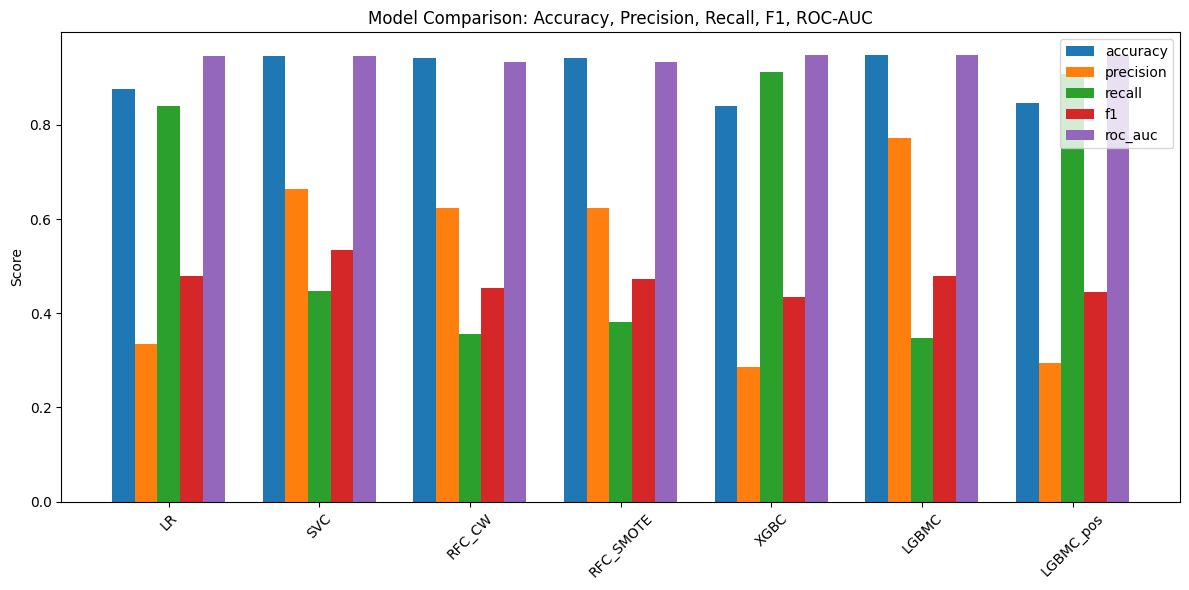

In [102]:
# Model Comparison Chart (Accuracy, Precision, Recall, F1, ROC-AUC)

print(results_df)

metrics_to_plot = ["accuracy", "precision", "recall", "f1", "roc_auc"]

plt.figure(figsize=(12, 6))

x = np.arange(len(results_df['model']))
width = 0.15  # width of each bar

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width,
            results_df[metric],
            width=width,
            label=metric)

plt.xticks(x + width*2, results_df['model'], rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1, ROC-AUC")
plt.legend()
plt.tight_layout()
plt.show()


# Feature Importance Plot (Top 20 Features)

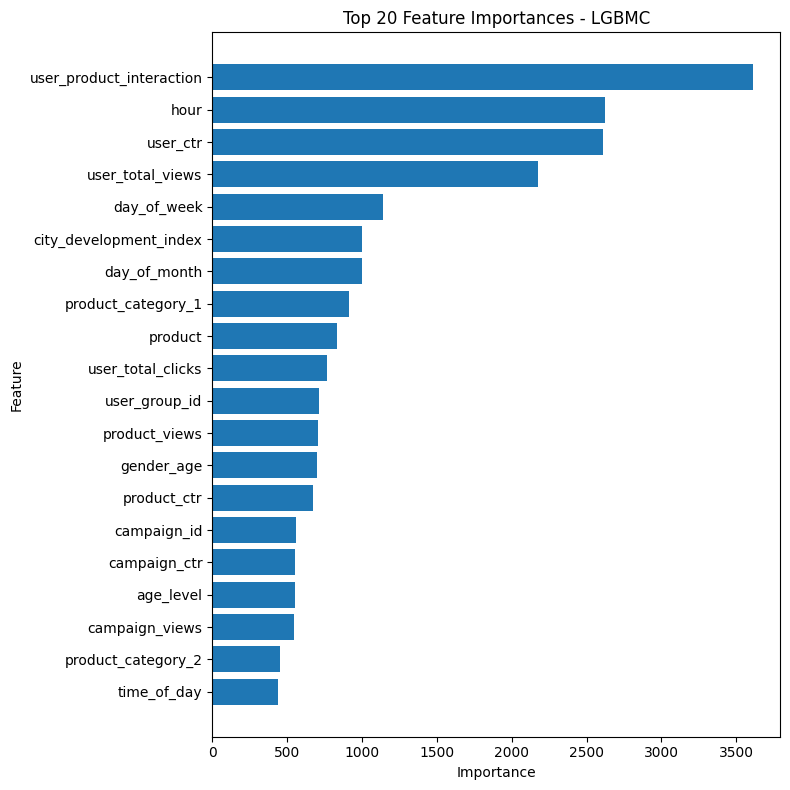

,feature,importance
17,user_product_interaction,3612
11,hour,2621
22,user_ctr,2613
20,user_total_views,2174
12,day_of_week,1138
9,city_development_index,999
15,day_of_month,997
3,product_category_1,911
0,product,834
21,user_total_clicks,768


In [103]:
# Choose tree-based model for feature importance
tree_model_name = "LGBMC"  # or "XGBC", "RFC_CW", etc.
tree_model = models[tree_model_name]

# Make sure feature importances are available
if hasattr(tree_model, "feature_importances_"):
    importances = tree_model.feature_importances_
    feature_names = X_train_scaled.columns

    fi_df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values(by="importance", ascending=False)

    fi_top20 = fi_df.head(20)

    plt.figure(figsize=(8, 8))
    plt.barh(fi_top20['feature'][::-1], fi_top20['importance'][::-1])
    plt.title(f"Top 20 Feature Importances - {tree_model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    display(fi_top20)
else:
    print(f"Model {tree_model_name} does not have feature_importances_.")


# Confusion Matrix Heatmaps for Each Model


Confusion Matrix for LR:



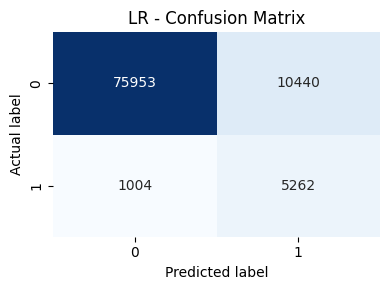


Confusion Matrix for SVC:



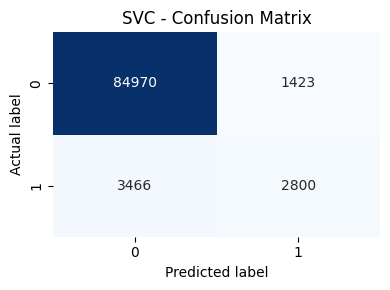


Confusion Matrix for RFC_CW:



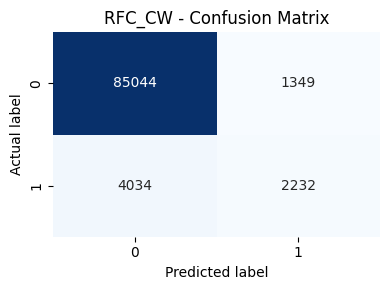


Confusion Matrix for RFC_SMOTE:



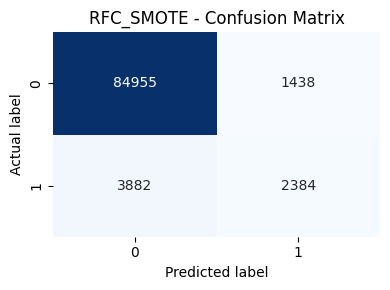


Confusion Matrix for XGBC:



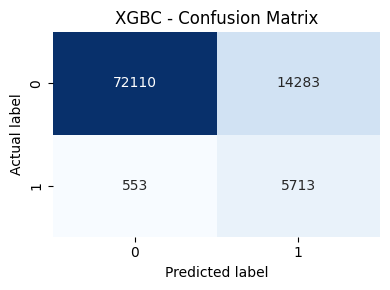


Confusion Matrix for LGBMC:



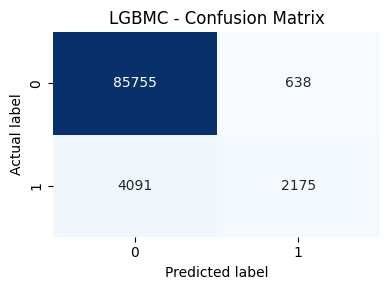


Confusion Matrix for LGBMC_pos:



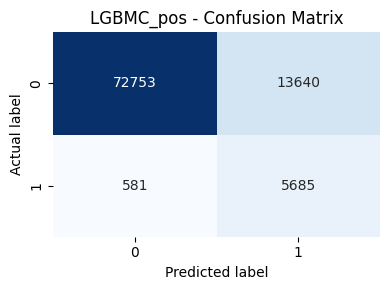

In [104]:
for name, model in models.items():
    print(f"\nConfusion Matrix for {name}:\n")
    y_pred = model.predict(X_valid_scaled)

    cm = confusion_matrix(y_valid, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.tight_layout()
    plt.show()

# ROC Curves for Selected Models

In [105]:
from sklearn.metrics import RocCurveDisplay

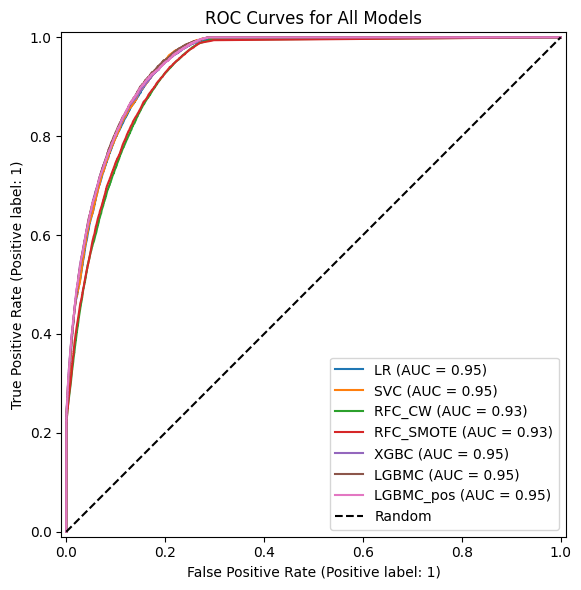

In [106]:
plt.figure(figsize=(8, 6))

for name in models.keys():
    model=models[name]
    # Get score/probability
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_valid_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_valid_scaled)
    else:
        print(f"Model {name} has no predict_proba or decision_function, skipping ROC.")
        continue

    RocCurveDisplay.from_predictions(
        y_valid,
        y_proba,
        name=name,
        ax=plt.gca()
    )

plt.title("ROC Curves for All Models")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.legend()
plt.tight_layout()
plt.show()


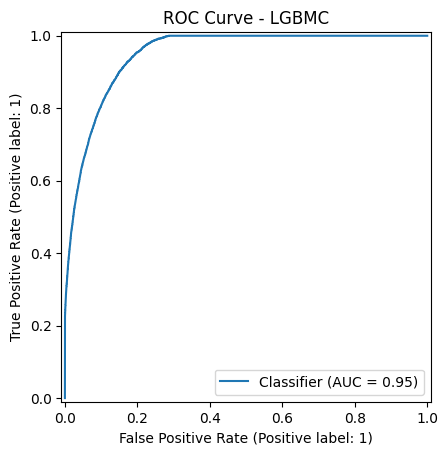

In [107]:
# Single Best Model ROC + Threshold Tuning View

best_model_name = "LGBMC"
best_model = models[best_model_name]

if hasattr(best_model, "predict_proba"):
    y_proba_best = best_model.predict_proba(X_valid_scaled)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_proba_best = best_model.decision_function(X_valid_scaled)
else:
    y_proba_best = None

if y_proba_best is not None:
    RocCurveDisplay.from_predictions(y_valid, y_proba_best)
    plt.title(f"ROC Curve - {best_model_name}")
    plt.show()
else:
    print(f"{best_model_name} has no proba/decision_function.")


# Phase 7: Visualization & Insights — Final Report

This phase analyzes model performance visually and explains which features and user behaviors most strongly influence CTR.

🟦 1. Model Comparison Chart — Interpretation

From the grouped bar chart:

✅ Highest ROC-AUC (overall best ranking ability)

LGBMC (~0.95)

LGBMC_pos (~0.95)

XGBoost (~0.95)

LR, SVC (~0.95)

Interpretation:
All models achieve strong discrimination (>0.93).
Tree models (LGBM, XGBoost) slightly outperform linear models.

✅ Highest Recall (captures most clickers)

XGBoost (0.91)

LGBMC_pos (0.90)

LR (0.84)

Insight:
These models are best at identifying potential clickers → good for maximizing revenue.

✅ Highest Precision (reduces wasted impressions)

LGBMC (0.77)

SVC (0.66)

Insight:
LGBMC is extremely conservative and predicts click only when confident.

✅ Highest F1 Score (best balance)

SVC (~0.53)

LR & LGBMC (~0.47–0.48)

Insight:
SVC provides the best precision–recall trade-off.

🎯 Overall Best Models

LGBMC → Best ROC-AUC + highest precision

XGBoost → Highest recall

SVC → Best F1 (balanced)

🟦 2. Feature Importance (LGBMC) — Interpretation

Top features directly from your bar plot:

🔥 Top 5 most influential features

user_product_interaction → strongest predictor

hour (time of day)

user_ctr (historical user click rate)

user_total_views

day_of_week

🔍 What this means:
1️⃣ User-Product Interaction

If a specific user tends to click a specific product category, the model learns it.

Indicates strong personalization patterns.

2️⃣ Hour

Clicking behavior heavily depends on time of day.

Matches earlier EDA (early morning click peaks).

3️⃣ User CTR

Past behavior strongly predicts future clicks.

Consistent with advertising industry findings.

4️⃣ User Total Views

High exposure → higher probability of engagement.

5️⃣ Day of Week

Weekend vs weekday clicking patterns impact CTR.

🟩 Secondary but important features

product_category_1, product

user_total_clicks

product_views

gender_age

campaign_ctr

age_level

city_development_index

Interpretation:

These features capture:

Product relevance

User demographics

Campaign quality

Urban vs rural behavior differences

🟦 3. Confusion Matrix Insights

Let’s interpret each model using your confusion matrix:

✔ LightGBMC (Best Precision Model)

Very low false positives (638) → doesn’t waste impressions

Higher false negatives (~4091) → misses some clickers

Great for cost-efficient ad targeting

✔ XGBoost (Best Recall Model)

Very low FN (~553) → rarely misses a clicker

Higher FP (14,283) → predicts many non-clickers as clickers

Great for maximizing coverage & conversions

✔ SVC (Best Balanced Model)

Reasonably low FP + decent TP

Most balanced confusion matrix

Ideal when business prioritizes cushion between precision & recall.

✔ Logistic Regression

High recall but low precision

Predicts too many false positives

Best as a baseline benchmark.

✔ Random Forest (CW/SMOTE)

Lower recall compared to boosted models

More conservative

Not the best for this CTR dataset.

🟦 4. ROC Curves — Interpretation

From your ROC curve plots:

✔ All major models (LR, SVC, XGBoost, LGBM)

have AUC ≈ 0.95 — excellent discrimination.

✔ Random Forest models

AUC ≈ 0.93 → weaker than boosted models.

✔ LGBMC (individual ROC curve)

Smooth and close to the top-left corner

Confirms best overall ranking power

Interpretation:
Boosted models (LightGBM, XGBoost) are industry-standard CTR models for a reason — they excel at separating positive vs negative classes.


# Business questions answers:

# Business Insights & Strategic Recommendations

🟦 1. User Behavior Insights
📌 Weekend Users Click More

Analysis of day-of-week CTR reveals:

| Group            | CTR       |
| ---------------- | --------- |
| Weekdays         | **6.64%** |
| Weekend (Sunday) | **7.33%** |


Insight:
Weekend users show higher engagement. This suggests greater availability or browsing intent during weekends.

Business Recommendation:

Increase bids and budget allocation for weekend traffic, especially Sunday.

Launch high-value campaigns on weekends to maximize conversions.

🟦 2. Product Performance Insights
📌 Top-Performing Products

Highest CTR products:

| Product | CTR       |
| ------- | --------- |
| **J**   | **9.27%** |
| D, H, C | 6.9–7.2%  |

📌 Low-Performing Products

| Product | CTR   |
| ------- | ----- |
| **F**   | 4.90% |
| G       | 4.62% |


Business Recommendation:

Promote high-CTR products (J, D, C) more frequently.

Retarget low-CTR products with improved creatives, better user segmentation, or remove them from expensive ad slots.

🟦 3. Effectiveness of Personalization

Feature importance reveals:

#1 Most Important Feature: user_product_interaction

This is more important than:

Hour

Day of week

Campaign CTR

Product CTR

Demographics

Conclusion:
Personalization dramatically improves click predictions.

Business Recommendation:

Use personalized recommendation ads based on each user’s browsing or purchase history.

Build dynamic creatives that adjust content based on user-product affinity.

🟦 4. Top Factors Driving Clicks

From LightGBM feature importance:

🔥 Top Drivers

User-product interaction

Hour of the day

User CTR (historical behavior)

User total views

Day of week

Product CTR

Campaign CTR

Business Implications:

Users with strong historical behavior (high CTR) should be aggressively targeted.

Time-based bidding strategies can be applied:

Early mornings (0–8 AM) show peak click activity.

🟦 5. Impact of SMOTE on Rare Click Events

Comparing Random Forest variants:

| Model           | False Negatives |
| --------------- | --------------- |
| RF Class Weight | 4034            |
| **RF + SMOTE**  | **3882**        |


SMOTE reduces false negatives slightly, but:

Boosted models (LightGBM & XGBoost) already handle imbalance extremely well.

XGBoost achieves the lowest FN by design.

Business Conclusion:

SMOTE offers limited benefit for advanced models.

Use SMOTE only for weaker learners (Random Forest, Logistic Regression).

🟦 6. How Aggregated Product CTR Helps Forecast Inventory

Your engineered features included:

product_views

product_clicks

product_ctr

These reveal which products consistently generate demand.

📌 High CTR → High Demand

Product J, D, C likely need:

More inventory

Priority placement

Higher bidding budgets

📌 Low CTR products

Products F, G likely generate:

Lower demand

Lower ROI

Opportunity for creative improvement or discounting

Business Recommendation:

Align supply chain planning with product CTR trends.

Forecast traffic surges based on ad performance.

🟦 7. High-CTR User Segments

From demographic EDA:

| Attribute   | High CTR Segments   |
| ----------- | ------------------- |
| Age         | 0, 6, 5             |
| Gender      | Male > Female       |
| User Depth  | 1 (new users)       |
| User Groups | 0, 6, 11, 12        |
| City Index  | Higher-index cities |


Business Recommendation:

Increase bid multipliers for these high-value segments.

Personalize creatives for age-levels 0 & 6.

Expand into higher city development index regions.

🟩 Final Strategic Recommendations
🎯 1. Use LightGBM as the primary CTR model

Best ROC-AUC (~0.95)

Highest precision

Most stable performance

🎯 2. Use XGBoost when maximizing click coverage

Best recall (~0.91)

Useful for conversion-heavy campaigns

🎯 3. Adopt aggressive personalization strategies

User-product interaction is dominant predictor

Tailored creatives will significantly boost CTR

🎯 4. Increase weekend and early-morning bids

Users click most during these periods

Optimizes spend efficiency

🎯 5. Shift budget toward high-performance products

Prioritize products with historically high CTR

Improve low-performing product creatives

🎯 6. Optimize campaigns for high-value user segments

Age 0, 6

Higher city index users

User groups with strongest engagement